In [11]:
import os

In [12]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\RANJAN_KESHRI\Desktop\MTECH\DL\Projects\Covid19-Face-Mask-detection-main


In [13]:
try:
    # Change the current working Directory    
    os.chdir("./Dataset/mask/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")        


Directory changed


# <center><font color='red'>Covid-19 : Face Mask Detection</font></center>

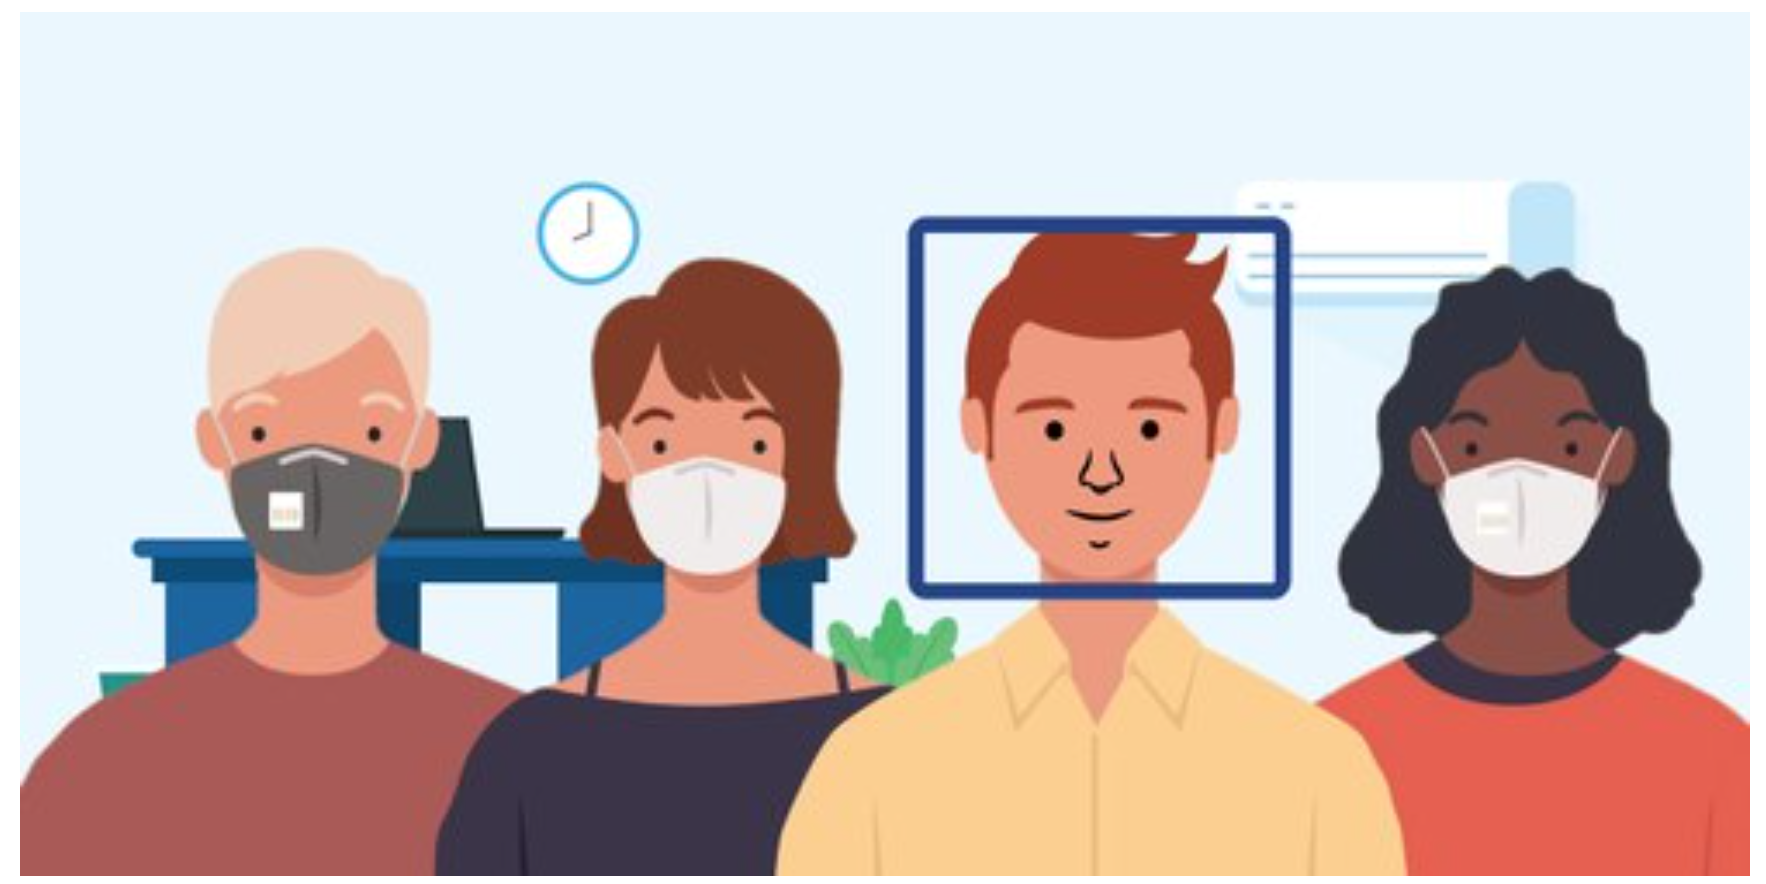

## <font color = 'Orange'>Problem Statement</font>

<b>Covid-19 started in November 2019 and started to spread across the world killing 3.74 million people. To curb the spread were to wear masks and maintain 6 feet distance. Although vaccines are available now and the cases have come down in some few countries, many countries are still struggling. In order to aid in stopping the spread and identify individuals not following the safety policies, we aim to build an Object Detection and Convolution Neural Network based face mask and social distance detection system. The dataset to be used contains numerous images of instances where people are with and without mask and the model aims to identify people violating safety policies and flag the images with violation concerns.</b>

## <font color='orange'>The Dataset</font>

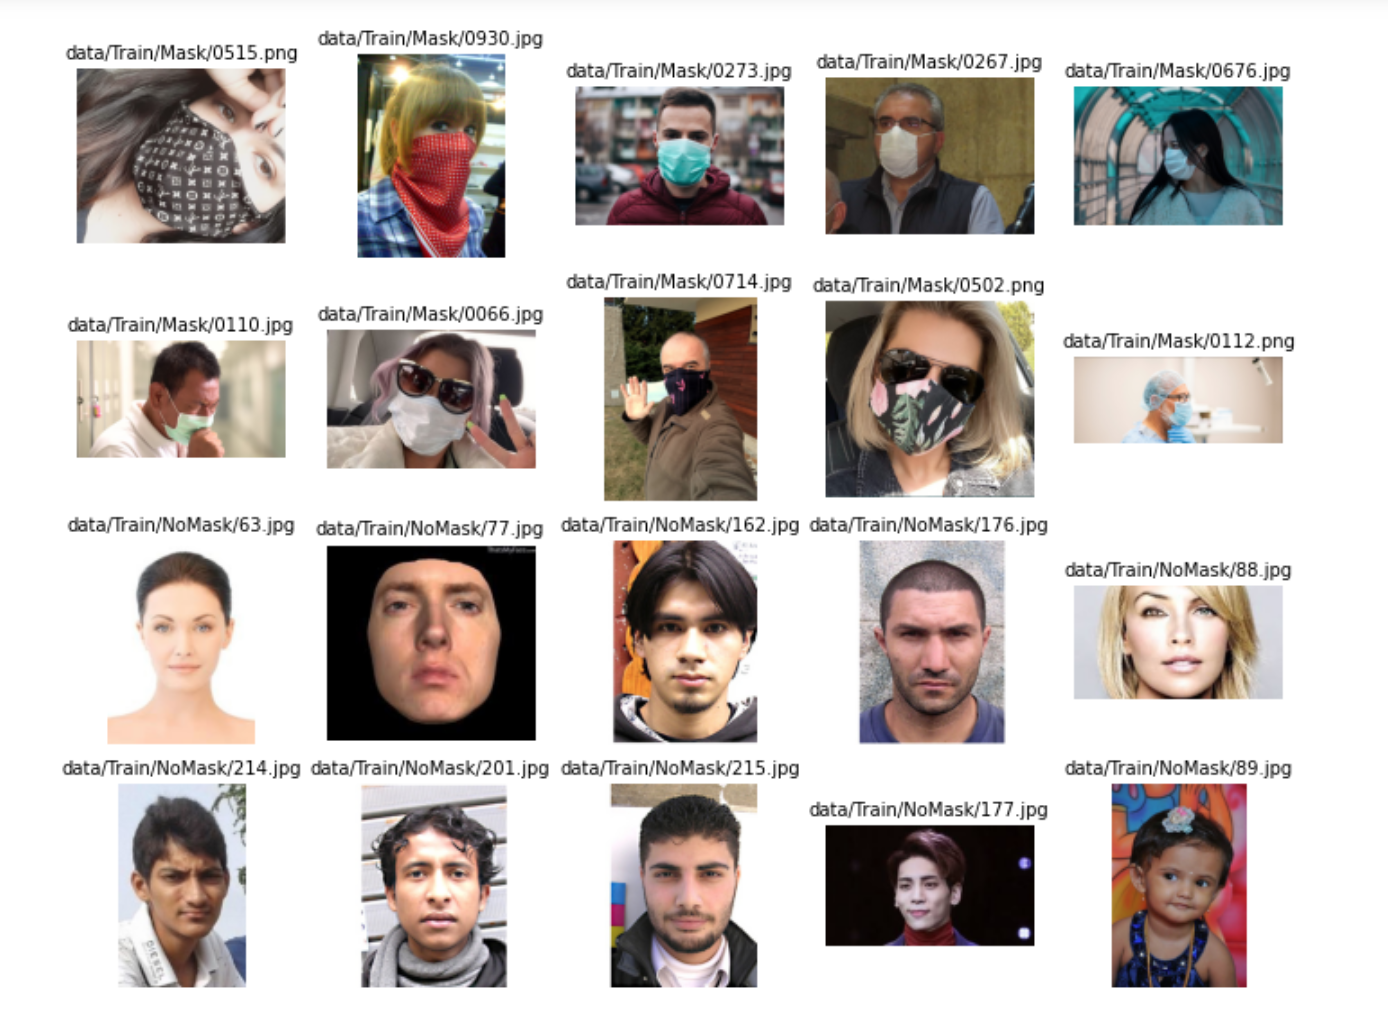

## <font color='orange'>Data Preprocessing</font>
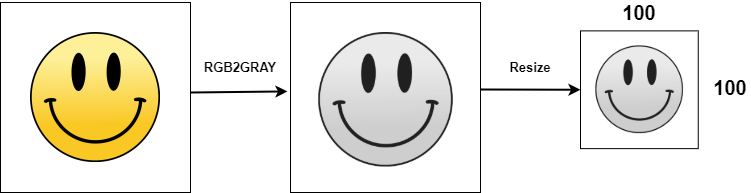

In [2]:
import cv2,os

data_path='data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'mask': 0, 'nomask': 1}
['mask', 'nomask']
[0, 1]


In [3]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [7]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from tensorflow.keras.utils import to_categorical

new_target=to_categorical(target)

In [8]:
data.shape

(1376, 100, 100, 1)

In [9]:
new_target.shape

(1376, 2)

In [10]:
np.save('data',data)
np.save('target',new_target)